# Лабораторная 4
# Линейные модели, SVM и деревья решений.
# Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
- одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
- SVM;
- дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. 
6. Сравните качество полученных моделей.
7. Постройте график, показывающий важность признаков в дереве решений.

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.tree import plot_tree
from sklearn import tree

# Импорт данных

In [2]:
data = pd.read_csv('Admission_Predict.csv', encoding = 'ISO-8859-1')

In [3]:
data.head()     

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Обработка данных

Типы данных в представленном датасете

In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Проверим, есть ли в датасете пропущенные значения:

In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

В данном датасете нет строк или столбцов, содержащих пропущенные значения.

In [6]:
data.columns.tolist()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

Столбец "Serial No." - столбец, включающий в себя индексы строк таблицы. Для дальнейшего анализа он нам не понадобится. Удалим его:

In [7]:
data = data.drop(columns = 'Serial No.')
data.columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Проверим, содержатся ли в данных дубликаты:

In [10]:
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [11]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


Дубликатов в данных нет.

# Разделение выборки на обучающую и тестовую

С использованием метода train_test_split разделим выборку на обучающую и тестовую:

In [12]:
data.shape

(400, 8)

In [13]:
# Признаки без целевой переменной
x = data.drop('Chance of Admit ', axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
# Целевая переменная
y = data['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#20% данных будут отложены для тестирования, а 80% будут использованы для обучения модели

In [16]:
# Размер обучающей выборки
x_train.shape, y_train.shape

((320, 7), (320,))

In [17]:
# Размер тестовой выборки
x_test.shape, y_test.shape

((80, 7), (80,))

# Обучение моделей

## Линейная регрессия

In [19]:
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

LinearRegression()

## SVM

In [20]:
model_svm = SVR()
model_svm.fit(x_train, y_train)

SVR()

## Дерево решений

In [21]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

DecisionTreeRegressor()

# Оценка качества моделей

1. Mean Absolute Error

In [22]:
print(f'MAE for Linear Regression:{mean_absolute_error(y_test, model_lin.predict(x_test))}')
print(f'MAE for SVR:{mean_absolute_error(y_test, model_svm.predict(x_test))}')
print(f'MAE for Decision Tree:{mean_absolute_error(y_test, model_tree.predict(x_test))}')

MAE for Linear Regression:0.044957798995776746
MAE for SVR:0.0706079862496473
MAE for Decision Tree:0.0655


2. Mean Squared Error

In [24]:
print(f'MSE for Linear Regression:{mean_squared_error(y_test, model_lin.predict(x_test))}')
print(f'MSE for SVR:{mean_squared_error(y_test, model_svm.predict(x_test))}')
print(f'MSE for Decision Tree:{mean_squared_error(y_test, model_tree.predict(x_test))}')

MSE for Linear Regression:0.004442679729994752
MSE for SVR:0.007634449617841046
MSE for Decision Tree:0.008432499999999999


# Важность признаков в дереве решений

In [25]:
feature_importances = model_tree.feature_importances_
print(feature_importances)

[0.08166626 0.03113981 0.00952738 0.03177156 0.02272381 0.8106873
 0.01248388]


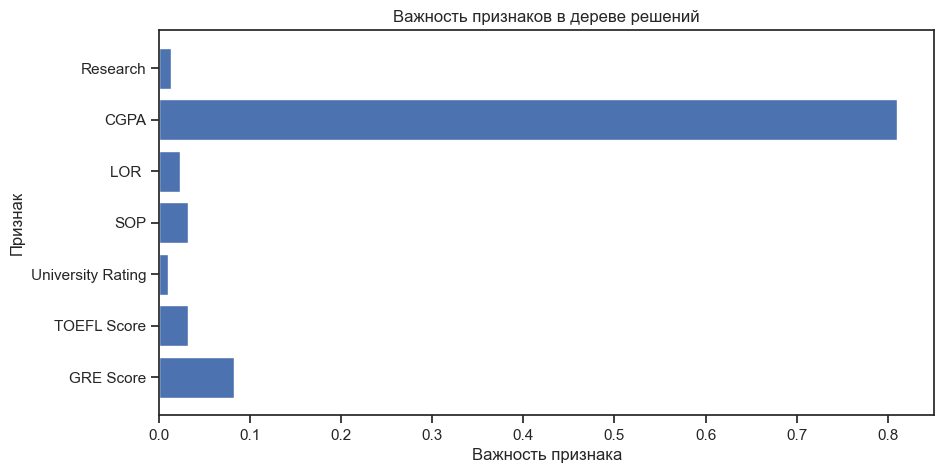

In [26]:
# график
plt.figure(figsize=(10, 5))
plt.barh(model_tree.feature_names_in_, feature_importances)
plt.xlabel("Важность признака")
plt.ylabel("Признак")
plt.title("Важность признаков в дереве решений")
plt.show()
     

# Визуализация дерева

[Text(0.5, 0.9, 'x[5] <= 8.735\nsquared_error = 0.02\nsamples = 320\nvalue = 0.726'),
 Text(0.25, 0.7, 'x[5] <= 8.015\nsquared_error = 0.011\nsamples = 189\nvalue = 0.641'),
 Text(0.125, 0.5, 'x[5] <= 7.67\nsquared_error = 0.01\nsamples = 59\nvalue = 0.547'),
 Text(0.0625, 0.3, 'x[5] <= 7.655\nsquared_error = 0.008\nsamples = 23\nvalue = 0.49'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[0] <= 315.5\nsquared_error = 0.007\nsamples = 36\nvalue = 0.583'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[5] <= 8.51\nsquared_error = 0.006\nsamples = 130\nvalue = 0.683'),
 Text(0.3125, 0.3, 'x[4] <= 4.25\nsquared_error = 0.005\nsamples = 86\nvalue = 0.667'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[6] <= 0.5\nsquared_error = 0.005\nsamples = 44\nvalue = 0.716'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n

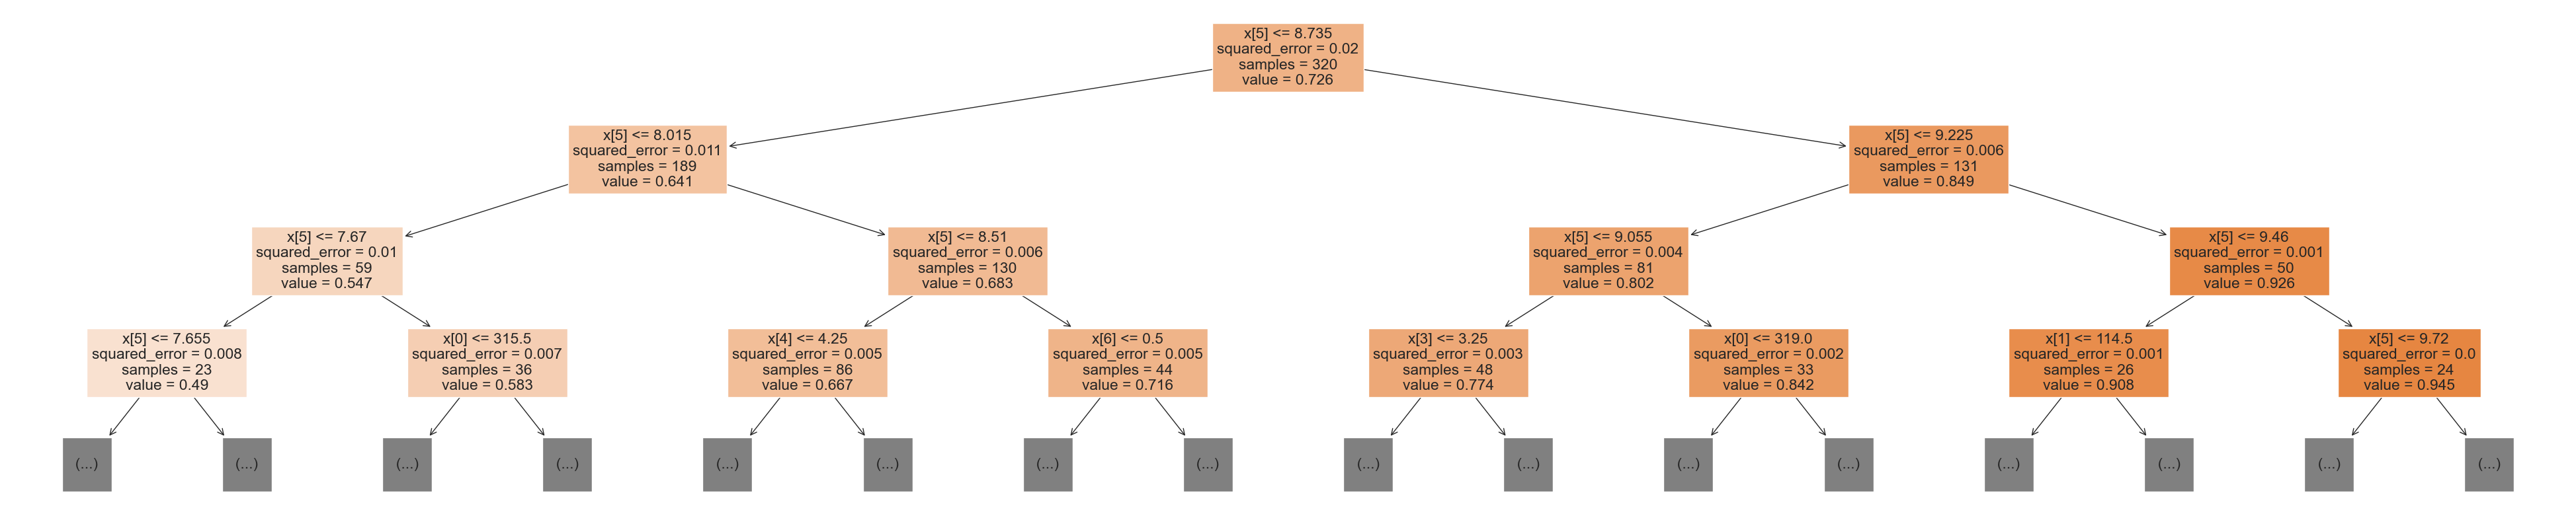

In [30]:
plt.figure(figsize=(50, 10))
tree.plot_tree(model_tree, max_depth=3, filled=True)